# Spaceship Titanic 

Ce notebook est le travail que j'ai effectué pour arriver à ma submission que j'ai déposé sur kaggle. Le but de cette compétition est d'entraîner un modèle pour prédire à partir d'un data frame donné, quels sont les personnes qui ont été envoyé dans une dimension parrallèle suite à un accident de vaisseau spatial.

In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [348]:
train_data = pd.read_csv("/content/train.csv")

In [349]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [350]:
train_data.head(n=10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [351]:
train_data['Destination']

0         TRAPPIST-1e
1         TRAPPIST-1e
2         TRAPPIST-1e
3         TRAPPIST-1e
4         TRAPPIST-1e
            ...      
8688      55 Cancri e
8689    PSO J318.5-22
8690      TRAPPIST-1e
8691      55 Cancri e
8692      TRAPPIST-1e
Name: Destination, Length: 8693, dtype: object

In [352]:
train_data['Destination'].describe()

count            8511
unique              3
top       TRAPPIST-1e
freq             5915
Name: Destination, dtype: object

In [353]:
train_data['HomePlanet'].describe()

count      8492
unique        3
top       Earth
freq       4602
Name: HomePlanet, dtype: object

In [354]:
train_data['HomePlanet'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8693 entries, 0 to 8692
Series name: HomePlanet
Non-Null Count  Dtype 
--------------  ----- 
8492 non-null   object
dtypes: object(1)
memory usage: 68.0+ KB


In [355]:
train_data['HomePlanet'].isna().sum()

201

In [356]:
train_data['Destination'].isna().sum()

182

In [357]:
train_data[['Spa', 'Transported']]

,Spa,Transported
0,0.0,False
1,549.0,True
2,6715.0,False
3,3329.0,False
4,565.0,True
...,...,...
8688,1643.0,False
8689,0.0,False
8690,1.0,True
8691,353.0,False


In [358]:
train_data[['HomePlanet', 'Destination','Transported']]

,HomePlanet,Destination,Transported
0,Europa,TRAPPIST-1e,False
1,Earth,TRAPPIST-1e,True
2,Europa,TRAPPIST-1e,False
3,Europa,TRAPPIST-1e,False
4,Earth,TRAPPIST-1e,True
...,...,...,...
8688,Europa,55 Cancri e,False
8689,Earth,PSO J318.5-22,False
8690,Earth,TRAPPIST-1e,True
8691,Europa,55 Cancri e,False


In [359]:
train_data['CryoSleep'].describe()

count      8476
unique        2
top       False
freq       5439
Name: CryoSleep, dtype: object

In [360]:
train_data['CryoSleep'].isna().sum()

217

In [361]:
train_data['CryoSleep'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8693 entries, 0 to 8692
Series name: CryoSleep
Non-Null Count  Dtype 
--------------  ----- 
8476 non-null   object
dtypes: object(1)
memory usage: 68.0+ KB


In [362]:
train_data['Cabin'].describe()

count        8494
unique       6560
top       G/734/S
freq            8
Name: Cabin, dtype: object

In [363]:
train_data['Cabin'].isna().sum()

199

# Remplacer les NaN avec les valeurs top

In [364]:
train_data.HomePlanet = train_data.HomePlanet.fillna('Earth')

In [365]:
train_data.Destination = train_data.Destination.fillna('TRAPPIST-1e')

In [366]:
train_data.CryoSleep = train_data.CryoSleep.fillna('False')

In [367]:
train_data.Cabin = train_data.Cabin.fillna('G/734/S')

# Data PreProcessing

In [368]:
from sklearn.preprocessing import OrdinalEncoder

In [369]:
enc = OrdinalEncoder()

In [370]:
train_data['CryoSleep'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8693 entries, 0 to 8692
Series name: CryoSleep
Non-Null Count  Dtype 
--------------  ----- 
8693 non-null   object
dtypes: object(1)
memory usage: 68.0+ KB


In [371]:
train_data['CryoSleep'].describe()

count      8693
unique        3
top       False
freq       5439
Name: CryoSleep, dtype: object

In [372]:
train_data['CryoSleep'].isna().sum()

0

In [373]:
train_data['CryoSleep'].unique()

array([False, True, 'False'], dtype=object)

In [374]:
train_data['CryoSleep']

0       False
1       False
2       False
3       False
4       False
        ...  
8688    False
8689     True
8690    False
8691    False
8692    False
Name: CryoSleep, Length: 8693, dtype: object

In [375]:
train_data['CryoSleep'].unique()

array([False, True, 'False'], dtype=object)

In [376]:
train_data[["HomePlanet","Destination"]] = enc.fit_transform(train_data[["HomePlanet","Destination"]])

In [377]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1.0,False,B/0/P,2.0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,0.0,False,F/0/S,2.0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,1.0,False,A/0/S,2.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,1.0,False,A/0/S,2.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,0.0,False,F/1/S,2.0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1.0,False,A/98/P,0.0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,0.0,True,G/1499/S,1.0,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,0.0,False,G/1500/S,2.0,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,1.0,False,E/608/S,0.0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [378]:
train_data.head(n=8693)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1.0,False,B/0/P,2.0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,0.0,False,F/0/S,2.0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,1.0,False,A/0/S,2.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,1.0,False,A/0/S,2.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,0.0,False,F/1/S,2.0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1.0,False,A/98/P,0.0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,0.0,True,G/1499/S,1.0,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,0.0,False,G/1500/S,2.0,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,1.0,False,E/608/S,0.0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [379]:
train_data.drop(index=98)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1.0,False,B/0/P,2.0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,0.0,False,F/0/S,2.0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,1.0,False,A/0/S,2.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,1.0,False,A/0/S,2.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,0.0,False,F/1/S,2.0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1.0,False,A/98/P,0.0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,0.0,True,G/1499/S,1.0,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,0.0,False,G/1500/S,2.0,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,1.0,False,E/608/S,0.0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [380]:
train_data['CryoSleep'].unique()

array([False, True, 'False'], dtype=object)

In [381]:
train_data = train_data[train_data.CryoSleep != "'False'"]

In [382]:
train_data['CryoSleep'].unique()

array([False, True, 'False'], dtype=object)

In [383]:
train_data['CryoSleep']

0       False
1       False
2       False
3       False
4       False
        ...  
8688    False
8689     True
8690    False
8691    False
8692    False
Name: CryoSleep, Length: 8693, dtype: object

In [384]:
train_data['CryoSleep'].values.reshape(-1, 1)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]], dtype=object)

In [385]:
train_data['CryoSleep']

0       False
1       False
2       False
3       False
4       False
        ...  
8688    False
8689     True
8690    False
8691    False
8692    False
Name: CryoSleep, Length: 8693, dtype: object

In [386]:
train_data['CryoSleep'].unique()

array([False, True, 'False'], dtype=object)

In [387]:
train_data['CryoSleep_clean'] = train_data['CryoSleep'].replace('False', np.nan)

train_data['CryoSleep_encoded'] = enc.fit_transform(train_data[['CryoSleep_clean']])



In [388]:
train_data.drop('CryoSleep', axis=1, inplace=True)
train_data.rename(columns={'CryoSleep_clean': 'CryoSleep', 'CryoSleep_encoded': 'CryoSleepOrdinal'}, inplace=True)


In [389]:
train_data

,PassengerId,HomePlanet,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CryoSleep,CryoSleepOrdinal
0,0001_01,1.0,B/0/P,2.0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,False,0.0
1,0002_01,0.0,F/0/S,2.0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,False,0.0
2,0003_01,1.0,A/0/S,2.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,0.0
3,0003_02,1.0,A/0/S,2.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,0.0
4,0004_01,0.0,F/1/S,2.0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1.0,A/98/P,0.0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,False,0.0
8689,9278_01,0.0,G/1499/S,1.0,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,True,1.0
8690,9279_01,0.0,G/1500/S,2.0,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,False,0.0
8691,9280_01,1.0,E/608/S,0.0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,False,0.0


In [390]:
train_data['Cabin'].describe()

count        8693
unique       6560
top       G/734/S
freq          207
Name: Cabin, dtype: object

In [391]:
train_data['Transported'] = train_data['Transported'].replace({False: 0.0, True: 1.0})

# print the updated dataframe
train_data

,PassengerId,HomePlanet,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CryoSleep,CryoSleepOrdinal
0,0001_01,1.0,B/0/P,2.0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,False,0.0
1,0002_01,0.0,F/0/S,2.0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,False,0.0
2,0003_01,1.0,A/0/S,2.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,False,0.0
3,0003_02,1.0,A/0/S,2.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,False,0.0
4,0004_01,0.0,F/1/S,2.0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1.0,A/98/P,0.0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0.0,False,0.0
8689,9278_01,0.0,G/1499/S,1.0,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0.0,True,1.0
8690,9279_01,0.0,G/1500/S,2.0,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1.0,False,0.0
8691,9280_01,1.0,E/608/S,0.0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0.0,False,0.0


In [392]:

# compute the Pearson correlation coefficient between columns A and B
corr_coef = train_data['CryoSleepOrdinal'].corr(train_data['Transported'])

# print the correlation coefficient
print(corr_coef)


0.46864486081240414


In [393]:
train_data[['HomePlanet', 'Destination', 'CryoSleepOrdinal']].isnull().sum()

HomePlanet            0
Destination           0
CryoSleepOrdinal    217
dtype: int64

In [394]:
train_data['CryoSleepOrdinal'].describe()

count    8476.000000
mean        0.358306
std         0.479531
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: CryoSleepOrdinal, dtype: float64

In [395]:
train_data['CryoSleepOrdinal'].fillna(0, inplace = True)

In [396]:
train_data['Transported'].info()

<class 'pandas.core.series.Series'>
Int64Index: 8693 entries, 0 to 8692
Series name: Transported
Non-Null Count  Dtype  
--------------  -----  
8693 non-null   float64
dtypes: float64(1)
memory usage: 135.8 KB


In [397]:
train_data['Transported']=train_data['Transported'].astype(float)

# Modélisation, test de modèle etc

In [398]:
y = train_data.Transported

In [399]:
features_name = ['HomePlanet', 'Destination', 'CryoSleepOrdinal']

In [400]:
X = train_data[features_name]

In [401]:
X.describe()

,HomePlanet,Destination,CryoSleepOrdinal
count,8693.000000,8693.000000,8693.000000
mean,0.649833,1.494306,0.349362
std,0.795183,0.814966,0.476796
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000
50%,0.000000,2.000000,0.000000
75%,1.000000,2.000000,1.000000
max,2.000000,2.000000,1.000000


La nature du problème étant une classification binaire on va choisir un algorithme de régression logistique

In [402]:
from sklearn.linear_model import LogisticRegression

In [403]:
model_lr = LogisticRegression(random_state=1)

In [404]:
model_lr.fit(X,y)

LogisticRegression(random_state=1)

In [405]:
predictions_train  = model_lr.predict(X)

print(predictions_train)


[0. 0. 0. ... 0. 0. 0.]


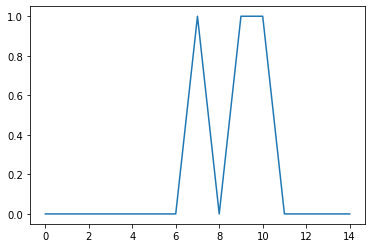

In [406]:
plt.plot(predictions_train[:15])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

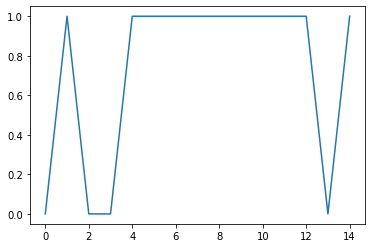

In [407]:
plt.plot(y[:15])
plt.show

Quelque chose n'est pas bon, le modèle ne semble pas adéquat dès la première vue.

# On va alors essayer de faire un decision tree

In [408]:
from sklearn.tree import DecisionTreeRegressor

model_dtr = DecisionTreeRegressor(random_state=1)

model_dtr.fit(X,y)

DecisionTreeRegressor(random_state=1)

In [409]:
predictions_dtr = model_dtr.predict(X, )

print(predictions_dtr)

[0.42614379 0.30862208 0.42614379 ... 0.30862208 0.38651685 0.42614379]


# Première conclusion

On va dire que le premier modèle de machine learning convient... Même si il est pas vraiment accurate on trouvera une remédiation à dire en conclusion finale.

# Validation du modèle

In [410]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X,y, random_state=0)

In [411]:

model_lr_new = LogisticRegression(random_state=1)

In [412]:
model_lr_new.fit(train_X,train_y)

LogisticRegression(random_state=1)

In [413]:
val_predict = model_lr_new.predict(val_X)

In [414]:
val_predict

array([0., 0., 0., ..., 1., 1., 0.])

In [415]:
from sklearn.metrics import accuracy_score

In [416]:
val_as = accuracy_score(val_y, val_predict)

print(val_as)

0.7166513339466422


On peut affirmer que notre modèle donne 71,6% de bonnes prédictions. Cela pourrait être meilleur mais c'est assez correct.

# Appliquer le modèle aux données test pour envoyer le travail sur Kaggle

In [417]:
df = pd.read_csv('/content/evaluation.csv')

In [418]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [419]:
df_eval = df[['HomePlanet', 'Destination', 'CryoSleep']]

In [420]:
df_eval

,HomePlanet,Destination,CryoSleep
0,Earth,TRAPPIST-1e,True
1,Earth,TRAPPIST-1e,False
2,Europa,55 Cancri e,True
3,Europa,TRAPPIST-1e,False
4,Earth,TRAPPIST-1e,False
...,...,...,...
4272,Earth,TRAPPIST-1e,True
4273,Earth,TRAPPIST-1e,False
4274,Mars,55 Cancri e,True
4275,Europa,NaN,False


In [421]:
df_eval['HomePlanet'].describe()

count      4190
unique        3
top       Earth
freq       2263
Name: HomePlanet, dtype: object

In [422]:
df_eval['HomePlanet'].fillna('Earth', inplace = True)

<ipython-input-422-2e4633f8ac61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval['HomePlanet'].fillna('Earth', inplace = True)


In [423]:
df_eval['Destination'].describe()

count            4185
unique              3
top       TRAPPIST-1e
freq             2956
Name: Destination, dtype: object

In [424]:
df_eval['Destination'].fillna('TRAPPIST-1e', inplace = True)

<ipython-input-424-5b54bd585f27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval['Destination'].fillna('TRAPPIST-1e', inplace = True)


In [425]:
df_eval['CryoSleep'].isnull().sum()

93

In [426]:
df_eval['CryoSleep'].fillna('False', inplace = True)

<ipython-input-426-beae70b3589d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval['CryoSleep'].fillna('False', inplace = True)


In [427]:
df_eval['CryoSleep'].unique()

array([True, False, 'False'], dtype=object)

In [428]:
df_eval['CryoSleep_clean'] = df_eval['CryoSleep'].replace('False', np.nan)

df_eval['CryoSleep_encoded'] = enc.fit_transform(df_eval[['CryoSleep_clean']])

<ipython-input-428-ec82f4fcfa91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval['CryoSleep_clean'] = df_eval['CryoSleep'].replace('False', np.nan)
<ipython-input-428-ec82f4fcfa91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval['CryoSleep_encoded'] = enc.fit_transform(df_eval[['CryoSleep_clean']])


In [429]:
df_eval[["HomePlanet","Destination"]] = enc.fit_transform(df_eval[["HomePlanet","Destination"]])

<ipython-input-429-6ac9e03a5f4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval[["HomePlanet","Destination"]] = enc.fit_transform(df_eval[["HomePlanet","Destination"]])


In [430]:
df_eval

,HomePlanet,Destination,CryoSleep,CryoSleep_clean,CryoSleep_encoded
0,0.0,2.0,True,True,1.0
1,0.0,2.0,False,False,0.0
2,1.0,0.0,True,True,1.0
3,1.0,2.0,False,False,0.0
4,0.0,2.0,False,False,0.0
...,...,...,...,...,...
4272,0.0,2.0,True,True,1.0
4273,0.0,2.0,False,False,0.0
4274,2.0,0.0,True,True,1.0
4275,1.0,2.0,False,False,0.0


In [431]:
df_eval.drop('CryoSleep', axis=1, inplace=True)
df_eval.drop('CryoSleep_clean', axis=1, inplace=True)

df_eval = df_eval.rename(columns={'CryoSleep_encoded': 'CryoSleepOrdinal'})

<ipython-input-431-5a18b6f49b02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval.drop('CryoSleep', axis=1, inplace=True)
<ipython-input-431-5a18b6f49b02>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval.drop('CryoSleep_clean', axis=1, inplace=True)


In [432]:
df_eval

,HomePlanet,Destination,CryoSleepOrdinal
0,0.0,2.0,1.0
1,0.0,2.0,0.0
2,1.0,0.0,1.0
3,1.0,2.0,0.0
4,0.0,2.0,0.0
...,...,...,...
4272,0.0,2.0,1.0
4273,0.0,2.0,0.0
4274,2.0,0.0,1.0
4275,1.0,2.0,0.0


In [434]:
df_eval.isnull().sum()

HomePlanet           0
Destination          0
CryoSleepOrdinal    93
dtype: int64

In [435]:
df_eval['CryoSleepOrdinal'].describe()

count    4184.000000
mean        0.369025
std         0.482598
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: CryoSleepOrdinal, dtype: float64

In [436]:
df_eval['CryoSleepOrdinal'].fillna(0, inplace=True)

In [437]:
df_eval_predictions = model_lr_new.predict(df_eval)

df_eval_predictions

array([1., 0., 1., ..., 1., 0., 1.])

In [438]:
df_eval['Transported'] = df_eval_predictions

In [440]:
df_eval['PassengerId'] = df['PassengerId']

In [441]:
df_eval

,HomePlanet,Destination,CryoSleepOrdinal,Transported,PassengerId
0,0.0,2.0,1.0,1.0,0013_01
1,0.0,2.0,0.0,0.0,0018_01
2,1.0,0.0,1.0,1.0,0019_01
3,1.0,2.0,0.0,0.0,0021_01
4,0.0,2.0,0.0,0.0,0023_01
...,...,...,...,...,...
4272,0.0,2.0,1.0,1.0,9266_02
4273,0.0,2.0,0.0,0.0,9269_01
4274,2.0,0.0,1.0,1.0,9271_01
4275,1.0,2.0,0.0,0.0,9273_01


In [442]:
submission = df_eval[['PassengerId', 'Transported']]

In [443]:
submission

,PassengerId,Transported
0,0013_01,1.0
1,0018_01,0.0
2,0019_01,1.0
3,0021_01,0.0
4,0023_01,0.0
...,...,...
4272,9266_02,1.0
4273,9269_01,0.0
4274,9271_01,1.0
4275,9273_01,0.0


In [445]:
submission.to_csv('ilyesazni_submission.csv', index=False)